In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [396]:
df.shape

(1309, 14)

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [398]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [399]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [400]:
df.duplicated().sum()

0

In [401]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [402]:
df[df.duplicated(subset=['name', 'home.dest'])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
726,3,0,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


### Column Types

- Numerical Columns :- age, fare
- Categorical Columns :- pclass, survived, sex, sibsp, parch, ticket, embarked, name, cabin, home.dest

### Summary of dataset

- Null values :-
  - 263 in age column
  - 1 in fare column
  - 1014 in cabin column
  - 2 in embarked column
  - 823 in boat column
  - 1188 in body column
  - 564 in home.dest column

#### Dealing with Null Values

In [403]:
# replacing missing age values with the median age value
df['age'].fillna(df['age'].median(), inplace=True)

In [404]:
# replcing the missing fare value with median fare
df['fare'].fillna(df['fare'].median(), inplace=True)

In [405]:
# replacing missing embarked stations with mode values
df['embarked'].fillna(df['embarked'].mode().values[0], inplace=True)

In [406]:
# cabin column is removed becaseu more than 75% values are null
df.drop(columns=['cabin'], inplace=True)

In [407]:
# body column is removed because almost 90% values are null
df.drop(columns=['body'], inplace=True)

In [408]:
# replacing the missing values with the mode valeu of the home.dest column
df['home.dest'].fillna(df['home.dest'].mode().values[0], inplace=True)

In [409]:
df['boat'].fillna('Not Recorded', inplace=True)

In [410]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
boat         0
home.dest    0
dtype: int64

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   embarked   1309 non-null   object 
 10  boat       1309 non-null   object 
 11  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


All the null values are removed from the dataset, now the dataset is looks clean and in good shape

## Univariate Analysis on Age Column:

- Conclusion:
  - distribution of Age values are slightly positive
  - there are some outliers found

In [412]:
df['age'].describe()

count    1309.000000
mean       29.503183
std        12.905246
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

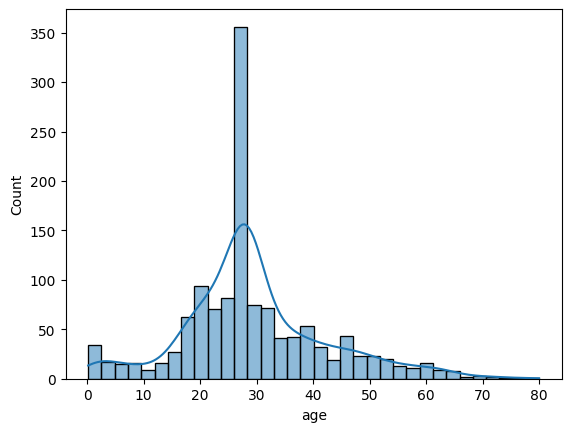

In [413]:
sns.histplot(df['age'], kde=True)

In [414]:
df['age'].skew()

0.5409839345003297

<Axes: ylabel='age'>

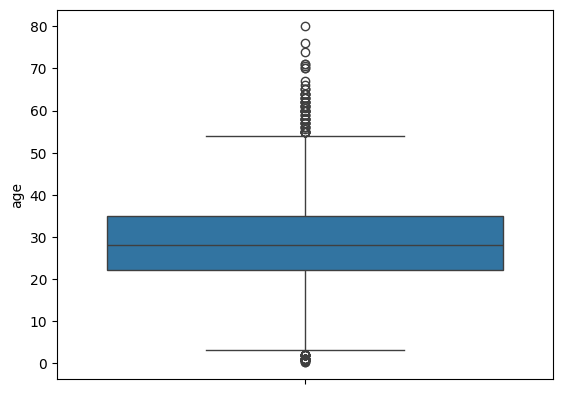

In [415]:
sns.boxplot(df['age'])

In [416]:
# code to calucate number of outleirs
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lowerbound = Q1 - (1.5 * IQR)
upperbound = Q3 + (1.5 * IQR)

outliers =  df[(df['age'] < lowerbound) | (df['age'] > upperbound)].shape[0]


print(f'Number of Outliers :', outliers)

Number of Outliers : 101


## Univariate Analysis on Fare Column:

- Conclusion:
  - fare column has fare value not for individual person but for the entire family and the total fare value is added to each individial family member
  - fare values distribution are highly right-skewed (positively skewed)
  - we have to findout the individual fare for each of the passenger and that can be done by creating new column family size which combine both the sibsp and parch columns

In [417]:
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
809,3,0,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.3750,S,Not Recorded,"Rotherfield, Sussex, England Essex Co, MA"
920,3,0,"Keane, Mr. Andrew ""Andy""",male,28.0,0,0,12460,7.7500,Q,Not Recorded,"New York, NY"
538,2,1,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,C.A. 34644,12.7375,C,14,"Milford, NH"
685,3,0,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,S,Not Recorded,"Treherbert, Cardiff, Wales"
558,2,1,"Silven, Miss. Lyyli Karoliina",female,18.0,0,2,250652,13.0000,S,16,"Finland / Minneapolis, MN"
972,3,0,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,S,Not Recorded,"New York, NY"
714,3,1,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,S,C,"Hong Kong New York, NY"
696,3,0,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,S,Not Recorded,"New York, NY"
561,2,0,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,S,Not Recorded,"Sault St Marie, ON"
393,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,S,Not Recorded,"Guernsey / Elizabeth, NJ"


In [418]:
df[df['ticket'] == '19950']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,S,10,"Winnipeg, MB"
112,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,S,10,"Winnipeg, MB"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,S,10,"Winnipeg, MB"
114,1,0,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,S,Not Recorded,"Winnipeg, MB"
115,1,0,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,S,Not Recorded,"Winnipeg, MB"
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,S,10,"Winnipeg, MB"


In [419]:
df['fare'].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

mean is higher than the median it means that the outliers are present

<Axes: xlabel='fare', ylabel='Count'>

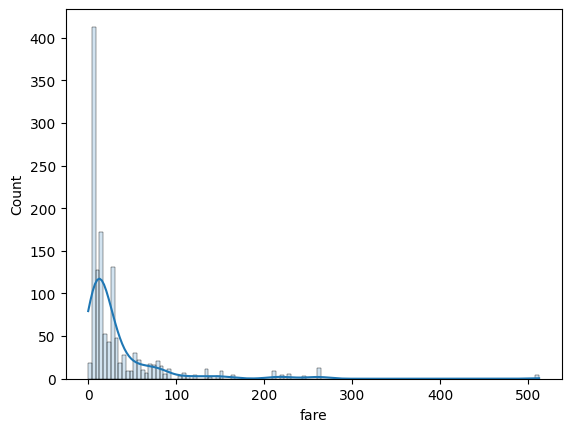

In [420]:
sns.histplot(df['fare'], kde=True, alpha=0.2)

In [421]:
df['fare'].skew()

4.3695095504693855

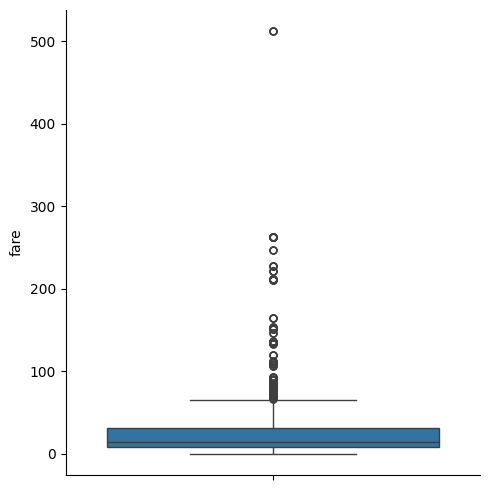

In [422]:
sns.catplot(df['fare'], kind='box')

In [423]:
# code to calucate number of outleirs
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)

IQR = Q3 - Q1

lowerbound = Q1 - (1.5 * IQR)
upperbound = Q3 + (1.5 * IQR)

outliers =  df[(df['fare'] < lowerbound) | (df['fare'] > upperbound)]

outliers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1176,3,0,"Sage, Mr. Douglas Bullen",male,28.0000,8,2,CA. 2343,69.5500,S,Not Recorded,"New York, NY"
1177,3,0,"Sage, Mr. Frederick",male,28.0000,8,2,CA. 2343,69.5500,S,Not Recorded,"New York, NY"
1178,3,0,"Sage, Mr. George John Jr",male,28.0000,8,2,CA. 2343,69.5500,S,Not Recorded,"New York, NY"
1179,3,0,"Sage, Mr. John George",male,28.0000,1,9,CA. 2343,69.5500,S,Not Recorded,"New York, NY"


## Univariate Analysis on pclass Column:

- Conclusion:
  - ther are more passengers travelling in pclass 3, while pclass 2 and pclass 1 has almost similar number of passengers

In [424]:
df['pclass'].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

<Axes: xlabel='pclass'>

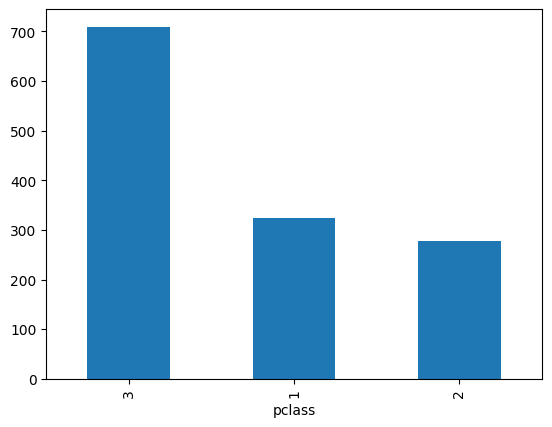

In [425]:
df['pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

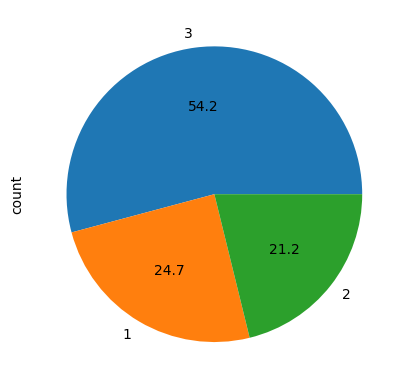

In [426]:
df['pclass'].value_counts().plot(kind='pie', autopct='%0.1f')

In [427]:
df['pclass'].unique()

array([1, 2, 3], dtype=int64)

In [428]:
df['pclass'].isnull().sum()

0

## Univariate Analysis on survived Column:

- Conclusion:
  - 61.8% not survived
  - 38.2% survived

In [429]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

<Axes: xlabel='survived'>

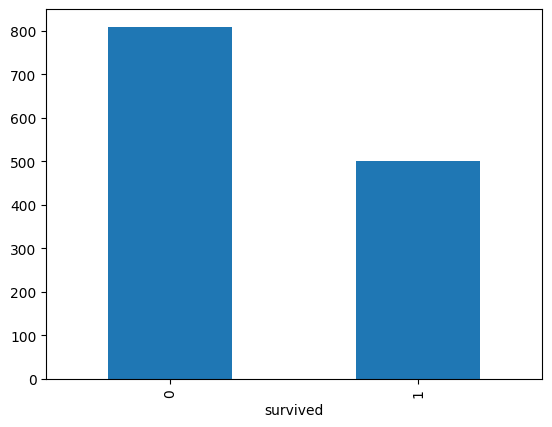

In [430]:
df['survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

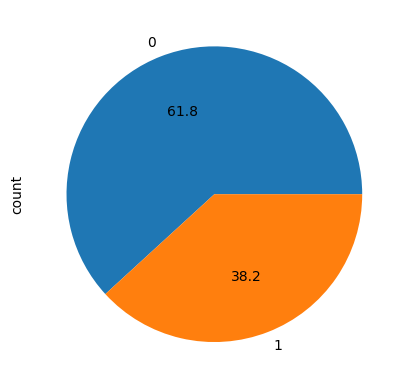

In [431]:
df['survived'].value_counts().plot(kind='pie', autopct='%0.1f')

In [432]:
df['survived'].isnull().sum()

0

In [433]:
df['survived'].unique()

array([1, 0], dtype=int64)

## Univariate Analysis on sex Column:

- Conclusion:
  - 64.4% males
  - 35.6% females

In [434]:
df['sex'].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

<Axes: xlabel='sex'>

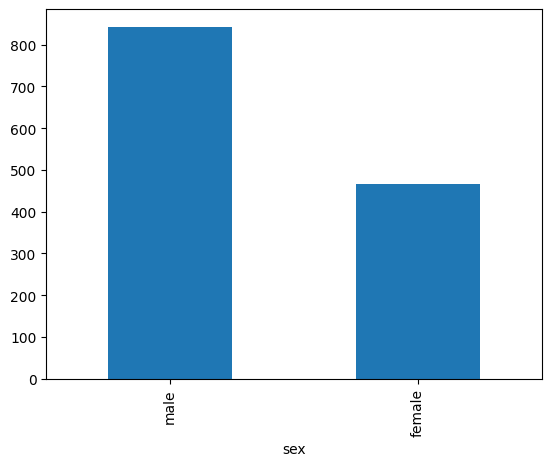

In [435]:
df['sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

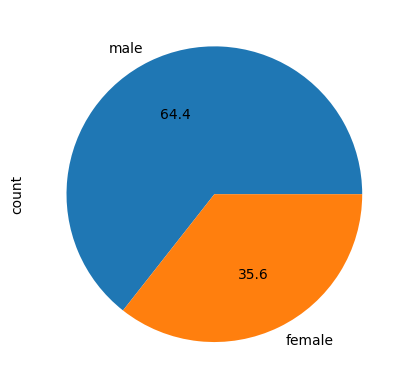

In [436]:
df['sex'].value_counts().plot(kind='pie', autopct='%0.1f')

In [437]:
df['sex'].isnull().sum()

0

In [438]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

## Univariate Analysis on Sibsp Column:

- Conclusion:
  - 68% passengers are travelling without sibling/spouse

In [439]:
df['sibsp'].value_counts()

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

<Axes: ylabel='sibsp'>

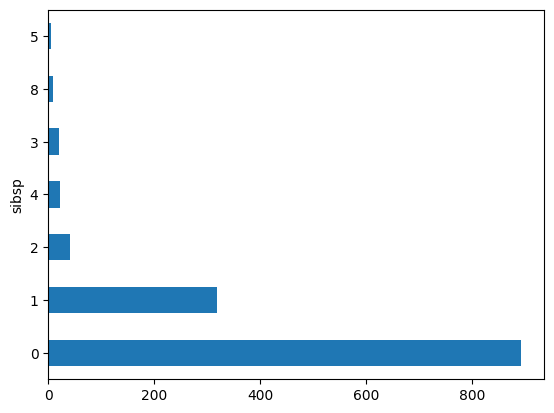

In [440]:
df['sibsp'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

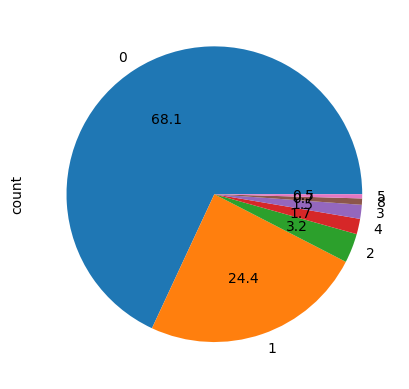

In [441]:
df['sibsp'].value_counts().plot(kind='pie', autopct='%0.1f')

## Univariate Analysis on Parch Column:

- Conclusion:
  - 76% passengers are travelling without parent/child

In [442]:
df['parch'].value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

<Axes: ylabel='parch'>

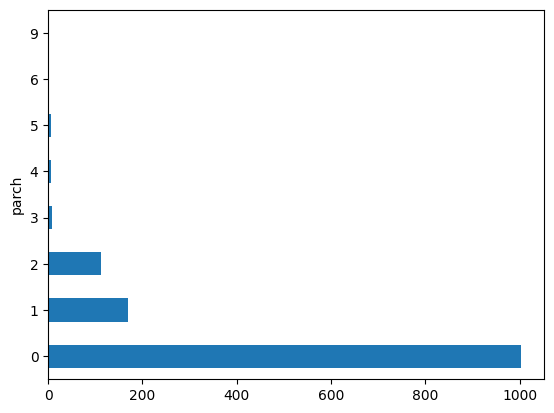

In [443]:
df['parch'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

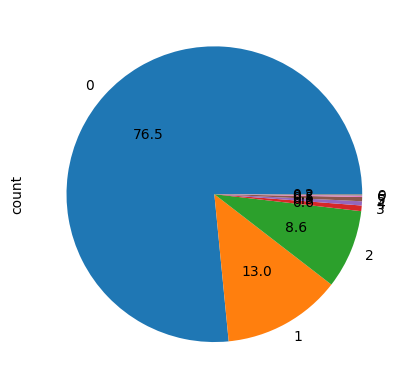

In [444]:
df['parch'].value_counts().plot(kind='pie', autopct='%0.1f')

The above both columns **Parch** and **Sibsp** are alone not providing much info, we can mergerd both to create a new column family size which show the number of family member travel with a person

## Univariate Analysis on embarked Column:

- Conclusion:
  - from southampton 70% passengers
  - from cherbourgh 21% passnegers
  - from queenstown 9& passengers

In [445]:
df['embarked'].value_counts()

embarked
S    916
C    270
Q    123
Name: count, dtype: int64

<Axes: ylabel='embarked'>

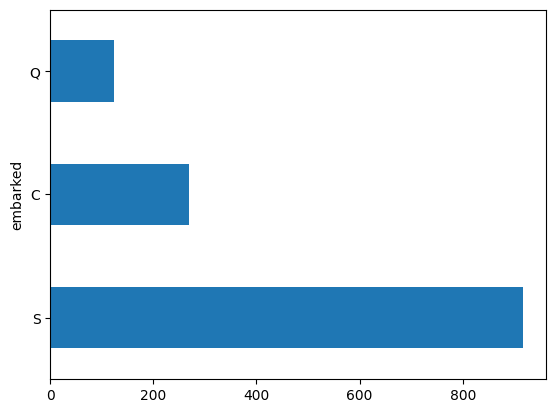

In [446]:
df['embarked'].value_counts().plot(kind='barh')

<Axes: ylabel='count'>

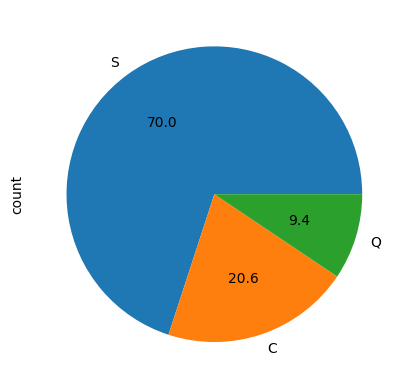

In [447]:
df['embarked'].value_counts().plot(kind='pie', autopct='%0.1f')

In [448]:
df['embarked'].isnull().sum()

0

### Bivariate Analysis on Two Catagorical Columns: **Survived** & **Pclass**

- death ratio:
  - people who travel in pclass 3 has higher death ratio as compared to other classes
- survival ratio:
  - people of plcass 1 are having higher survival ratio

In [449]:
pd.crosstab(df['survived'], df['pclass'], normalize='columns') * 100

pclass,1,2,3
survived,,,
0,38.080495,57.039711,74.471086
1,61.919505,42.960289,25.528914


<Axes: xlabel='pclass', ylabel='survived'>

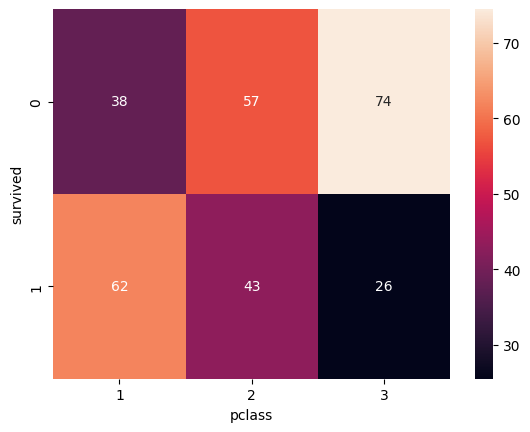

In [450]:
sns.heatmap(pd.crosstab(df['survived'], df['pclass'], normalize='columns') * 100,  annot=True)

### Bivariate Analysis on Two Catagorical Columns: **Survived** & **sex**

- death ratio:
  - female death ratio 27%
  - male death ratio 81%
- survival ratio:
  - female survival ratio 73%
  - male survival ratio 19%

In [451]:
pd.crosstab(df['survived'], df['sex'], normalize='columns') * 100

sex,female,male
survived,,
0,27.253219,80.901542
1,72.746781,19.098458


<Axes: xlabel='survived'>

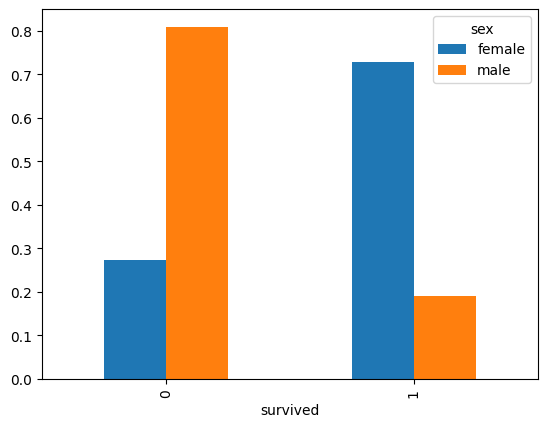

In [452]:
pd.crosstab(df['survived'], df['sex'], normalize='columns').plot(kind='bar')

<Axes: xlabel='sex', ylabel='survived'>

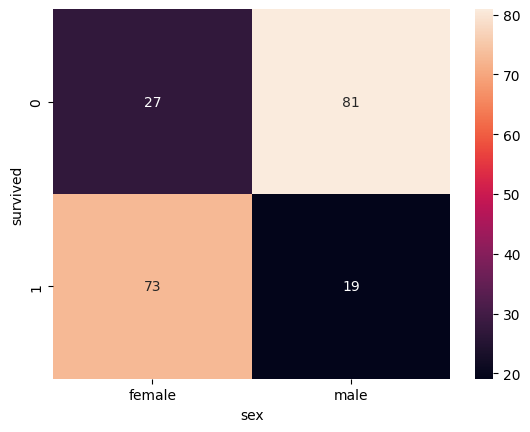

In [453]:
sns.heatmap(pd.crosstab(df['survived'], df['sex'], normalize='columns') * 100, annot=True)

### Bivariate Analysis on Two Catagorical Columns: **Survived** & **Embarked**
**Conclusion**

 - survival rate of the passengers from the cherbourgh station is high is high becasue they mostly are in pclass 1 which has high survival ratio


In [454]:
pd.crosstab(df['survived'], df['embarked'], normalize='columns') * 100

embarked,C,Q,S
survived,,,
0,44.444444,64.227642,66.593886
1,55.555556,35.772358,33.406114


<Axes: xlabel='survived'>

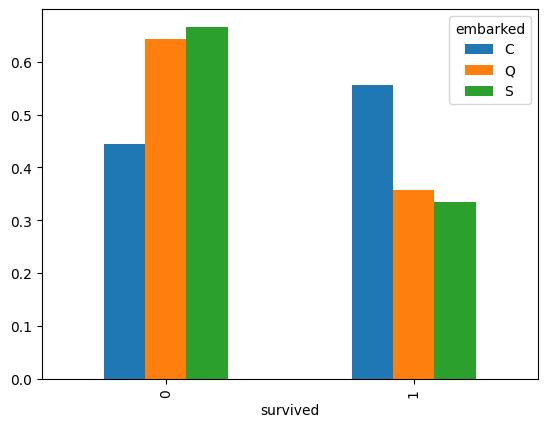

In [455]:
pd.crosstab(df['survived'], df['embarked'], normalize='columns').plot(kind='bar')

<Axes: xlabel='embarked', ylabel='survived'>

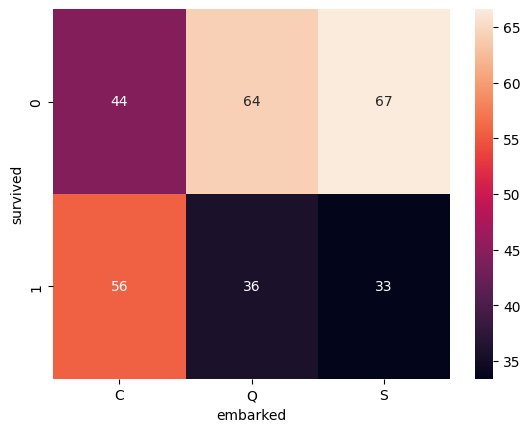

In [456]:
sns.heatmap(pd.crosstab(df['survived'], df['embarked'], normalize='columns')*100, annot=True)

- As you seen now the survival rate is higher for passenger from cherbourgh station while death rate is higher in passenger from southamton passengers
- for this we have to check with sex & embark relation, because uptill now we know that survival rate are higher for females and peple traveling in pclass 1


### checked the embarked with sex & pclass columns

In [457]:
pd.crosstab(df['sex'], df['embarked'], normalize='columns') * 100

embarked,C,Q,S
sex,,,
female,41.851852,48.780488,31.9869
male,58.148148,51.219512,68.0131


In [458]:
pd.crosstab(df['sex'], df['pclass'], normalize='columns') * 100

pclass,1,2,3
sex,,,
female,44.582043,38.267148,30.465444
male,55.417957,61.732852,69.534556


in the above three analysis we confirmed that people get into titanic from cherbourg suvived almost 55% because we check that mostly they are in Pclass 1. as we cehck it by seeing the correlation of column 'Embarked' with 'Sex', 'Pclass', 'Survived'. so the people come into from cherborugh station choose pclass 1 and becaseu of it chergourgh people survied more

### Bivariate Analysis on Numerical + Catagorical Column: **Survived** & **Age**
**Conclusion**

 - the survival rate from 0-10 age group is high, and after 10-40 age the not survival rate is high, at the same time from 35 to 40 age the survived dominating the becasue the avg age of the pclass 1 passsengers are about 38 age so it is dominating, and then age 50 - 80 survival rate decrease because of the agility and age increase

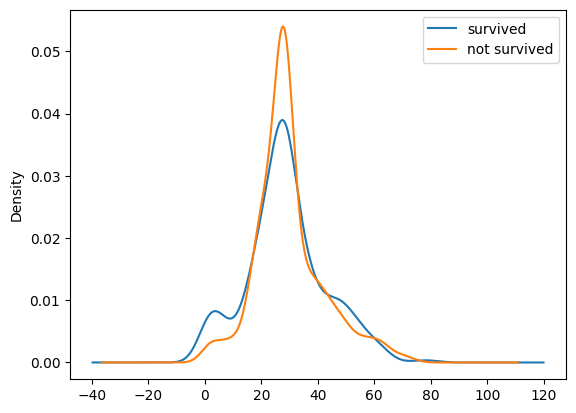

In [459]:
df[df['survived'] == 1]['age'].plot(kind='kde', label='survived')
df[df['survived'] == 0]['age'].plot(kind='kde', label='not survived')
plt.legend()

## Now We Do Feature Engineering

#### Feature Engineering on Fare col

In [460]:
df['sibsp'].value_counts()

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [461]:
df[df['sibsp'] == 8]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
1170,3,0,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"
1171,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"
1172,3,0,"Sage, Miss. Ada",female,28.0,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"
1173,3,0,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"
1174,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"
1175,3,0,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"
1176,3,0,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"
1177,3,0,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"
1178,3,0,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,S,Not Recorded,"New York, NY"


as you seen that all the passengers belongs to a same family and all have same ticket but the fare is is not for indiidual it the total fare that are mention in each of the family member 

In [462]:
df['fare_per_person'] = (df['fare']/(df['sibsp'] + df['parch'] + 1))

In [463]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest,fare_per_person
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,"St Louis, MO",211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON",37.8875
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON",37.8875
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON",37.8875
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON",37.8875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,Not Recorded,"New York, NY",7.2271
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,Not Recorded,"New York, NY",7.2271
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,Not Recorded,"New York, NY",7.2250
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,Not Recorded,"New York, NY",7.2250


<Axes: >

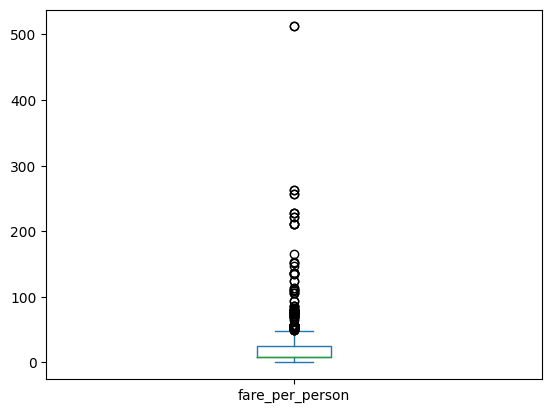

In [464]:
df['fare_per_person'].plot(kind='box')

In [465]:
df[['fare_per_person','fare']].describe()

,fare_per_person,fare
count,1309.000000,1309.000000
mean,20.513583,33.281086
std,35.761052,51.741500
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.566667,14.454200
75%,24.150000,31.275000
max,512.329200,512.329200


As you see by creaing new column fare per person and compare with the old fare column we have reduce the mean median and std value much

### Feature Engineering on Sibsp + Parch
we create a new column which combine both and new column will be family size

In [466]:
df['family_size'] = (df['sibsp'] + df['parch'] + 1)

In [467]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest,fare_per_person,family_size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,"St Louis, MO",211.3375,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON",37.8875,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON",37.8875,4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON",37.8875,4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,Not Recorded,"Montreal, PQ / Chesterville, ON",37.8875,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,Not Recorded,"New York, NY",7.2271,2
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,C,Not Recorded,"New York, NY",7.2271,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,Not Recorded,"New York, NY",7.2250,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,Not Recorded,"New York, NY",7.2250,1


Now creating a categorical column based on the family size column which will represnet is alone, medium family nad large family

In [468]:
df['family_type'] = df['family_size'].apply(lambda x: 'alone' if x == 1 else ('small' if x > 1 and x <= 4 else 'large'))

In [469]:
# dropping the sibsp and parch columns:
df.drop(['sibsp', 'parch'], axis=1, inplace=True)

In [470]:
df.sample(10)

,pclass,survived,name,sex,age,ticket,fare,embarked,boat,home.dest,fare_per_person,family_size,family_type
830,3,0,"Goodwin, Mr. Charles Edward",male,14.0,CA 2144,46.9000,S,Not Recorded,"Wiltshire, England Niagara Falls, NY",5.862500,8,large
850,3,0,"Hansen, Mr. Henry Damsgaard",male,21.0,350029,7.8542,S,Not Recorded,"New York, NY",7.854200,1,alone
1172,3,0,"Sage, Miss. Ada",female,28.0,CA. 2343,69.5500,S,Not Recorded,"New York, NY",6.322727,11,large
470,2,0,"Keane, Mr. Daniel",male,35.0,233734,12.3500,Q,Not Recorded,"New York, NY",12.350000,1,alone
259,1,1,"Seward, Mr. Frederic Kimber",male,34.0,113794,26.5500,S,7,"New York, NY",26.550000,1,alone
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,28.0,17770,27.7208,C,5,"New York, NY",27.720800,1,alone
1276,3,0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,345763,18.0000,S,Not Recorded,"New York, NY",9.000000,2,small
709,3,1,"Carr, Miss. Helen ""Ellen""",female,16.0,367231,7.7500,Q,16,"Co Longford, Ireland New York, NY",7.750000,1,alone
1303,3,0,"Yousseff, Mr. Gerious",male,28.0,2627,14.4583,C,Not Recorded,"New York, NY",14.458300,1,alone
1106,3,0,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,3101295,39.6875,S,Not Recorded,"New York, NY",6.614583,6,large


### Bivariate analysis of two columns: survived & family_type

- Survival rate:
  - if you are with small family, survival rate is high

- Non-Survival rate:
  - if you are with large family, survival rate is very low

In [472]:
pd.crosstab(df['survived'], df['family_type'], normalize='columns')*100

family_type,alone,large,small
survived,,,
0,69.746835,81.707317,43.707094
1,30.253165,18.292683,56.292906


<Axes: xlabel='survived'>

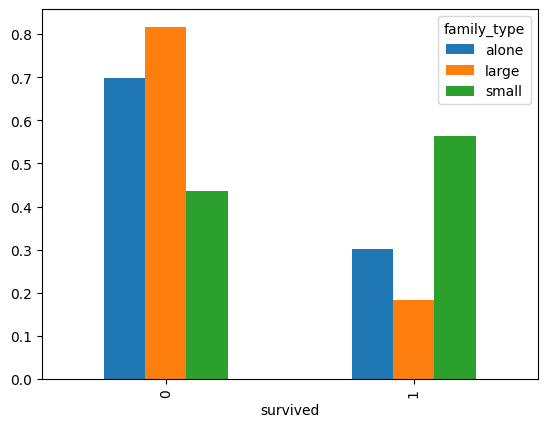

In [473]:
pd.crosstab(df['survived'], df['family_type'], normalize='columns').plot(kind='bar')

<Axes: xlabel='family_type', ylabel='survived'>

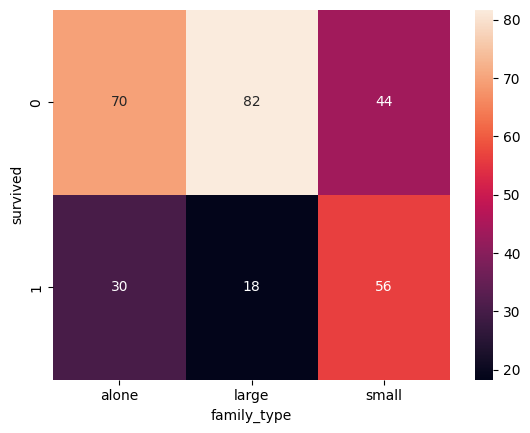

In [475]:
sns.heatmap(pd.crosstab(df['survived'], df['family_type'], normalize='columns')*100, annot=True)

In [476]:
# applying correlation on numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_matrix

,pclass,survived,age,fare,fare_per_person,family_size
pclass,1.000000,-0.312469,-0.377908,-0.558683,-0.504237,0.050027
survived,-0.312469,1.000000,-0.043818,0.244414,0.210796,0.026876
age,-0.377908,-0.043818,1.000000,0.178182,0.188546,-0.193742
fare,-0.558683,0.244414,0.178182,1.000000,0.832025,0.226609
fare_per_person,-0.504237,0.210796,0.188546,0.832025,1.000000,-0.094789
family_size,0.050027,0.026876,-0.193742,0.226609,-0.094789,1.000000


In [478]:
# correlation of survival column with other numerical columns
df.select_dtypes(include=['number']).corr()['survived']

pclass            -0.312469
survived           1.000000
age               -0.043818
fare               0.244414
fare_per_person    0.210796
family_size        0.026876
Name: survived, dtype: float64

<Axes: >

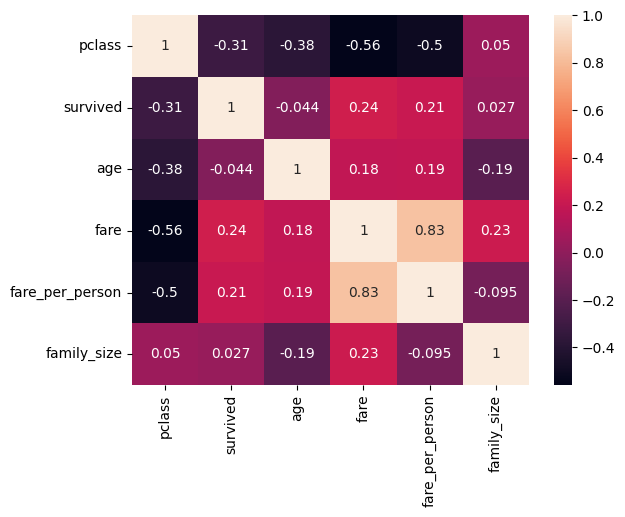

In [480]:
# the more brighter the cell the more strong correaltion between the columns
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

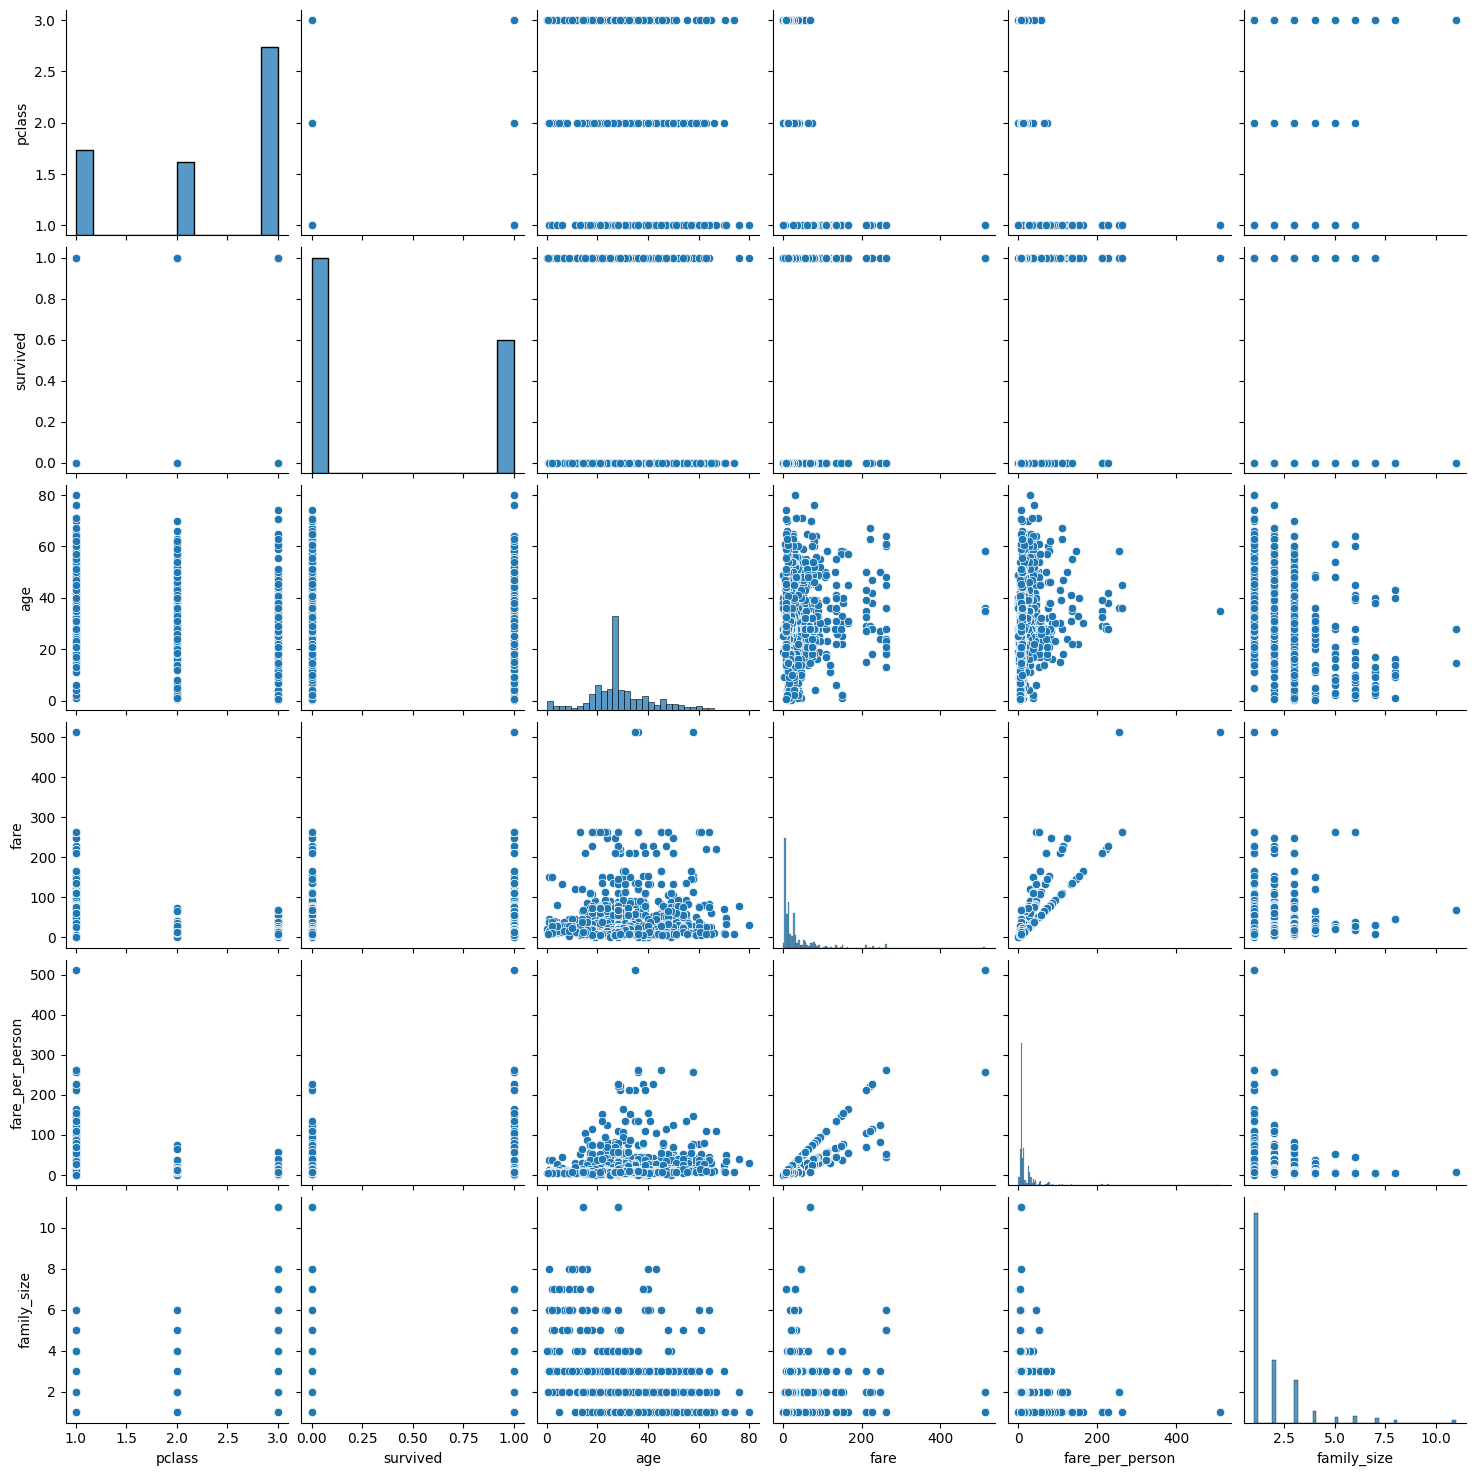

In [481]:
sns.pairplot(df)

In [482]:
df.to_csv('titanic_cleaned.csv', index=False)